## Playing with elliptic curves from LMFDB

Read in data files (= output from LMFDB https://www.lmfdb.org/) and check what's been added to the environment:

In [1]:
datafile = "./data/ec_rk0_cond1000-10000.sage"

load(datafile)
%who

data	 datafile	 labels	 make_data	 


Eyeball the top of the data sets:

In [2]:
from pprint import pprint

pprint(labels[:10])
pprint(data[:10])

['1001.b1',
 '1001.b2',
 '1001.b3',
 '1001.b4',
 '1002.a1',
 '1002.a2',
 '1002.b1',
 '1003.a1',
 '1003.c1',
 '1005.b1']
[[1, -1, 1, -9916, -377564],
 [1, -1, 1, -1006, 2552],
 [1, -1, 1, -621, -5764],
 [1, -1, 1, -16, -198],
 [1, 1, 0, -860, -10074],
 [1, 1, 0, -50, -192],
 [1, 1, 0, 564, 1872],
 [1, -1, 1, 63, -332],
 [1, 0, 1, -8, -11],
 [1, 1, 0, -297, -1944]]


The vectors are the EC coefficients, as we see from applying the function make_data():

In [3]:
ecdat = make_data()

pprint(ecdat[:10])
print( type(ecdat[0]) )

[Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - 9916*x - 377564 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - 1006*x + 2552 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - 621*x - 5764 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - 16*x - 198 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 860*x - 10074 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 50*x - 192 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 + x^2 + 564*x + 1872 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 + 63*x - 332 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - 8*x - 11 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 297*x - 1944 over Rational Field]
<class 'sage.schemes.elliptic_curves.ell_rational_field.EllipticCurve_rational_field_with_category'>


So ecdat[] is a list of elliptic curve objects. For example:

In [28]:
E = sample(ecdat, 1)[0]
# or
E = EllipticCurve('9963.c1')

print(E.cremona_label())
print(E.defining_polynomial())
print(E.rank())
print(E.gens())

9963c1
-x^3 + y^2*z + 126*x*z^2 + y*z^2 - 545*z^3
2
[(-11 : 24 : 1), (1 : 20 : 1)]


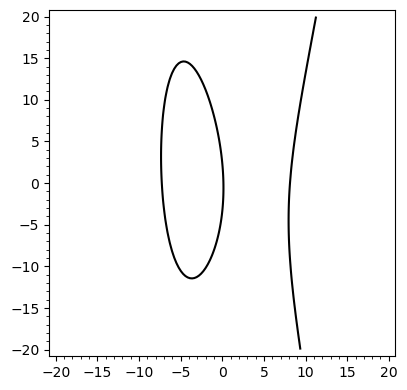

In [51]:
x,y = var('x,y')

contour_plot(- y^2 - x*y - y + x^3 - x^2 - 59*x + 8,
             (x,-20,20), (y,-20,20),
             fill=False,
             contours=(0.0,),
             plot_points = 150)

We can now apply all the built-in sage functions for elliptic curves:

In [26]:
E = ecdat[0][1]

print(E)
print(f'Conductor {E.conductor()}')

p = Primes().unrank(1) # n-th prime number
for _ in range(10):
    print(f'p = {p}: nr points = {E.Np(p)}')
    p = next_prime(p)

Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 6*x + 5 over Rational Field
Conductor 7501
p = 3: nr points = 2
p = 5: nr points = 8
p = 7: nr points = 4
p = 11: nr points = 9
p = 13: nr points = 13
p = 17: nr points = 11
p = 19: nr points = 25
p = 23: nr points = 28
p = 29: nr points = 20
p = 31: nr points = 29


Let's try reproducing the 'murmuration' plots in https://arxiv.org/abs/2204.10140

In [2]:
datafile0 = "./data/ec_rk0_cond7500-10000.sage"
datafile1 = "./data/ec_rk1_cond7500-10000.sage"
datafile2 = "./data/ec_rk2_cond7500-10000.sage"

r = 0
ecdat = []

for df in [datafile0, datafile1, datafile2]:
    data = []
    load(df)
    tmp = make_data()
    ecdat += [[r,E] for E in tmp]
    r += 1

In [11]:
import time

def a(E,p):
    return p+1-E.Np(p)

def f(r,n):
    p = Primes().unrank(n)
    arr = [a(e[1],p) for e in ecdat if e[0] == r]
    return round( sum(arr)/len(arr), 12 )


size = 1000
rg = range(1,size + 1)

start = time.time()
murmur0 = [f(0,n) for n in rg]
murmur1 = [f(1,n) for n in rg]
murmur2 = [f(2,n) for n in rg]
end = time.time()

print(f'Running time {end - start}')

Running time 251.66415691375732


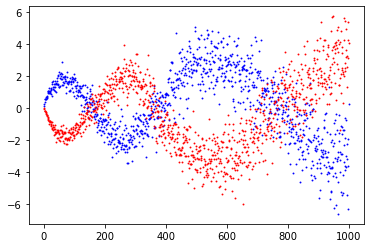

In [13]:
from matplotlib import pyplot as plt

plt.scatter(rg, murmur0, s = 0.8, c = 'blue')
plt.scatter(rg, murmur1, s = 0.8, c = 'red')
#plt.scatter(rg, murmur2, s = 0.8, c = 'green')
plt.show()